<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">
<image src="https://raw.githubusercontent.com/frautn/F2/main/docs/assets_python/logoUTN-500.svg"  width="100">
</a></td>
<td style="border:none;">Física 2<br>2024<br>Electromagnetismo<br>Material para trabajo en clase
</td>
</tr>
</table> 

# Campo eléctrico de distribuciones de cargas contínuas

Parte 1

En este cuaderno los campos se calculan con métodos numéricos simples, con el objetivo de visualizar y comprender como se obtiene el campo total pensando a los objetos extensos como una distribución de muchas cargas puntuales y sumando sus contribuciones.

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es"><image src="https://raw.githubusercontent.com/frautn/F2/main/docs/assets_python/by-nc-sa.svg" width="70" /></a></td>
<td style="border:none;">2024 Edgardo Palazzo (epalazzo@fra.utn.edu.ar)
</td>
</tr>
</table>

---

**Objetivos**

- Calcular campos eléctricos de distribuciones de cargas contínuas, pensando a dichas distribuciones compuestas por muchas cargas puntuales y sumando sus contribuciones.
- Presentar los cálculos simbólicos en Python.

**Tabla de contenidos**<a id='toc0_'></a>    
- 1. [Campo de una línea de carga](#toc1_)    
- 2. [Ejercicio XX.1: Segmento recto con carga uniforme](#toc2_)    
  - 2.1. [Cálculo exacto del campo de un segmento](#toc2_1_)    
  - 2.2. [Segmento muy largo (línea infinita) con carga uniforme](#toc2_2_)    
- 3. [Ejercicio XX.2: Dos segmentos](#toc3_)    
- 4. [Ejercicio XX.3: Anillo cargado uniformemente](#toc4_)    
  - 4.1. [Disco con carga uniforme](#toc4_1_)    
  - 4.2. [Plano muy grande (infinito) con carga uniforme](#toc4_2_)    
- 5. [Ejercicio XX.3: Dos planos](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.
%precision %.3f

import importlib
# import sympy as sym
# Necesario para que pylance ande bien con sympy:
sym = importlib.import_module('sympy')
sym.init_printing(use_unicode=False, wrap_line=False)


# ------------------------------------
# Lo siguiente es necesario para que funcione en Google Colab.
try:
  import libem as em
except:
  # No descarga los archivos (aunque sí descarga .git)
  !git clone -n https://github.com/frautn/F2.git --depth 1
  !cd UTN;git checkout HEAD electromagnetismo/libem.py
  sys.path.insert(0, 'F2/electromagnetismo')
  import libem as em

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip --quiet install ipympl
  from google.colab import output
  output.enable_custom_widget_manager()
# Fin Google colab.
# ------------------------------------

# %precision 3

# Figuras interactivas.
# Comentar si se quiere mantener las figuras luego de cerrar el cuaderno.
# %matplotlib widget

## 1. <a id='toc1_'></a>[Campo de una línea de carga](#toc0_)

Podemos pensar que una línea contínua de carga total $Q$ está formada por $N$ partículas de carga $q_i$ de forma que:
$$
Q = \sum_{i=1}^N q_i ~ . \tag{1}
$$

El campo eléctrico producido por cada carga $q_i$ ubicada en la posición $\vec{\text{x}}_i$ a lo largo de la línea, puede escribirse como:
$$
\vec{E}_i(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \frac{q_i}{|\vec{\text{r}}_i|^3} \vec{\text{r}}_i\, , \tag{2}
$$

donde
* $q_i$ es la carga eléctrica de la partícula i-ésima 
* $\vec{\text{r}}_i$ es el vector diferencia entre la posición donde se quiere obtener el vector de campo eléctrico ($\vec{\text{x}}$) y la posición de la partícula cargada ($\vec{\text{x}}_i$) : $\vec{\text{r}}_i = (x-x_i)\hat{i} + (y-y_i)\hat{j} + (z-z_i)\hat{k} $

En la siguiente figura se muestran a modo de ejemplo los vectores correspondientes a la primera ($q_1$) y a la última ($q_N$) carga a lo largo de una línea curvada. 

<div>
       <image src="https://raw.githubusercontent.com/frautn/F2/main/electromagnetismo/img/em02_linea.svg">
</div>

Por último, para obtener el campo total es necesario sumar los vectores de los campos de todas las $q_i$ a lo largo de la línea:
$$
\vec{E}(\vec{\text{x}}) = \sum_{i=1}^N \vec{E}_i(\vec{\text{x}})  ~ . \tag{3}
$$

Para calcular el campo eléctrico reutilizaremos la función que escribimos en el cuaderno [em01_campo_electrico.ipynb - sección 2.3](em01_campo_electrico.ipynb). En esa función ya sumábamos el campo producido por $N$ cargas, el nuevo desafío es escribir la configuración de cargas correspondiente para cada problema.


In [ ]:
def E(x, y, z, Q):
    """Calcula las componentes del campo eléctrico en N/C.
    Ingresar valores de x,y,z en metros y q en coulomb.
    Q es una lista de la forma:
    Q = [
        [q1,x1,y1,z1],
        [q2,x2,y2,z2],
        ...
        [qN,xN,yN,zN]
    ]
    """
    Ei,Ej,Ek = 0,0,0
    for qi in Q:
        r = ((x - qi[1])**2 + (y - qi[2])**2 + (z - qi[3])**2)**(3/2)
        Ei = Ei + 9E9 * qi[0] * (x - qi[1]) / r
        Ej = Ej + 9E9 * qi[0] * (y - qi[2]) / r
        Ek = Ek + 9E9 * qi[0] * (z - qi[3]) / r

    return Ei, Ej, Ek

## 2. <a id='toc2_'></a>[Ejercicio XX.1: Segmento recto con carga uniforme](#toc0_)

Segmento de longitud $L$, ubicado sobre el eje $x$, centrado en el origen y con carga total $Q$ distribuida uniformemente.

In [ ]:
# Carga total del objeto:
Qtotal = 1E-9
# Longitud del segmento (en m):
L = 40E-2
# Número de cargas en que se divide el cuerpo extenso:
N = 10

dq = Qtotal/N
# Separación entre cargas:
dx = L/N
# Valor inicial de x (el centro del primer "diferencial" de longitud dx):
x0 = -L/2 + dx/2

Q = []
for i in np.arange(N):
    Q = Q + [[dq, x0+i*dx,0,0]]


Veamos la contribución de cada porción del segmento en el cálculo del campo en alguna posición.

In [ ]:
x = [0, 0.15, 0]
em.plotEfcontribuciones(E, Q, x, limites=[-0.3, 0.3, -0.05, 0.65], scale=3)

Calculemos el campo en algunas posiciones para verificar que los resultados son los que esperamos.

In [ ]:
print("E(0,0.1,0)    = ", np.round(E(0,0.1,0,Q), decimals=3))
print("E(0,-0.1,0)   = ", np.round(E(0,-0.1,0,Q), decimals=3))
print("E(-0.2,0,0)   = ", np.round(E(-0.2,0,0,Q), decimals=3))
print("E(0.2,0,0)    = ", np.round(E(0.2,0,0,Q), decimals=3))
print("E(-0.1,0.1,0) = ", np.round(E(-0.1,0.1,0,Q), decimals=3))
print("E(0.1,0.1,0)  = ", np.round(E(0.1,0.1,0,Q), decimals=3))
print("E(0,0,0.1)    = ", np.round(E(0,0,0.1,Q), decimals=3))

In [ ]:
X = [[0,0.1,0],[0,-0.1,0],[-0.2,0,0],[0.2,0,0],[-0.1,0.1,0],[0.1,0.1,0],[-0.1,-0.1,0],[0.1,-0.1,0]]
em.plotEfvector(E, Q, X, limites=[-0.3,0.3,-0.3,0.3], title="Segmento con carga uniforme", scale=10)

In [ ]:
em.plotEf(E, Q, dx=0.3, density=0.5, title='Líneas de campo de un\n segmento con carga uniforme')

### 2.1. <a id='toc2_1_'></a>[Cálculo exacto del campo de un segmento](#toc0_)

Considerando que la distribución de carga es contínua, la suma que estamos realizando
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \sum_{i=1}^N \frac{q_i}{|\vec{\text{r}}_i|^3} \vec{\text{r}}_i\, , \tag{4}
$$

cuando el objeto se divide en cargas infinitesimales, se puede expresar como la siguiente integral:

$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \int \frac{\vec{\text{r}}}{|\vec{\text{r}}|^3} dq   ~ . \tag{5}
$$

En el caso de una carga distribuida a lo largo de una línea, la carga infinitesimal es
$$
dq = \lambda dl ~ \tag{6}
$$
siendo
* $\lambda$ una densidad lineal de carga (carga / longitud), que puede ser función de la posición
* $dl$ un diferencial de longitud, paralelo a la línea de carga.

Volviendo al caso del segmento sobre el eje $x$, el diferencial de longitud es $dl = dx$. Por lo tanto, si el segmento se desarrolla desde $x = a$ hasta $x = b$, el campo que genera se calcula como:

$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \int_a^b \frac{\vec{\text{r}}}{|\vec{\text{r}}|^3} \lambda dx = \frac{1}{4\pi\varepsilon_0} \int_a^b \frac{(x - x')\hat{i} + y\hat{j} + z\hat{k}}{((x-x')^2+y^2+z^2))^{3/2}} \lambda dx'  ~ . \tag{7}
$$


A continuación este cálculo en Python:

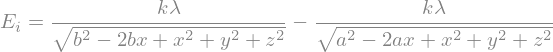

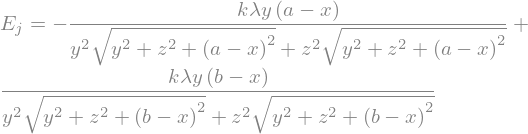

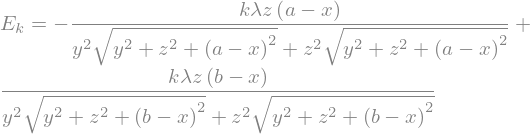

In [2]:
# X: variable de integración.
# El resultado de la integral depende de la zona donde ubicamos el punto campo.
# En este caso resolvemos solo para y>0 y z>0.
k,l,x,X,a,b = sym.symbols('k lambda x X a b')
y = sym.symbols('y', positive=True)
z = sym.symbols('z', positive=True)

Ei = sym.Eq(
  sym.Symbol('E_{i}'),
  sym.integrate(k*l*(x-X)/(sym.sqrt((x-X)**2+y**2+z**2))**3,(X,a,b))
)
Ej = sym.Eq(
  sym.Symbol('E_{j}'),
  sym.integrate(k*l*y/(sym.sqrt((x-X)**2+y**2+z**2))**3,(X,a,b))
)
Ek = sym.Eq(
  sym.Symbol('E_{k}'),
  sym.integrate(k*l*z/(sym.sqrt((x-X)**2+y**2+z**2))**3,(X,a,b))
)

display(Ei)
display(Ej)
display(Ek)

Podemos usar estas expresiones para obtener las componentes de $E$ reemplazando los valores de $\lambda$, $a$, $b$ y $k$ (se podría agregar un medio dieléctrico aquí, calculando el valor de $k$ para el correspondiente $\varepsilon_R$):

In [ ]:
Eii = Ei.subs([(k, 9E9), (l, 1E-9), (a, -0.5), (b, 0.5)])
Ejj = Ej.subs([(k, 9E9), (l, 1E-9), (a, -0.5), (b, 0.5)])
Ekk = Ek.subs([(k, 9E9), (l, 1E-9), (a, -0.5), (b, 0.5)])
display(Eii)
display(Ejj)
display(Ekk)

Y ahora podemos evaluar en la posición que nos interese. Recordar que estos resultados son válidos fuera del eje $x$, con $y>0$ y $z>0$.

In [ ]:
display(

    Eii.subs([(x,0), (y,0.1), (z,0)]),
    Ejj.subs([(x,0), (y,0.1), (z,0)]),
    Ekk.subs([(x,0), (y,0.1), (z,0)]),

    )

### 2.2. <a id='toc2_2_'></a>[Segmento muy largo (línea infinita) con carga uniforme](#toc0_)

El cálculo análitico para obtener el campo eléctrico producido por una línea recta de carga infinita es mucho más sencillo que el correspondiente a un segmento de longitud finita. Es por ello que se aprovecha el resultado analítico de la línea infinita para aproximar el campo de un segmento en regiones donde se lo puede considerar muy largo, cerca del centro del segmento.

A continuación compararemos los resultados calculando el campo cerca del centro de un segmento utilizando tres métodos: la aproximación de línea recta infinita, el cálculo numérico que estamos utilizando para sumar pequeñas cargas, y el resultado análitico exacto integrando sobre el segmento.

Campo de un hilo infinito:

$$
    \vec{E}(r) = \frac{2k\lambda}{r} \hat{r} ~ , \tag{40}
$$

donde
* $r$ es la distancia entre el punto donde se calcula el campo y la línea cargada
* $\hat{r}$ es la dirección radial respecto de la línea de carga
* $\lambda$ es la densidad lineal de carga

In [ ]:
def Ehilo(x, y, z, dq):
    """Calcula las componentes del campo eléctrico en N/C para un hilo
    infinito ubicado sobre el eje i, con densidad de carga dq.
    Ingresar valores de x,y,z en m y dq en C/m.
    """
    # Módulo de r al cuadrado:
    r2 = y**2+z**2
    Ej = 2 * 9E9 * dq * y / r2
    Ek = 2 * 9E9 * dq * z / r2

    return 0, Ej, Ek

Verifiquemos que se obtiene lo esperado:

In [ ]:
#Calculo de E en distintos r y angulos.

El cálculo analítico exacto para el campo de un segmento de longitud $L$ sobre el eje $i$, centrado en el origen, es:
$$
\vec{E}(\vec{\text{x}}) = ~ \tag{5}
$$

## 3. <a id='toc3_'></a>[Ejercicio XX.2: Dos segmentos](#toc0_)

## 4. <a id='toc4_'></a>[Ejercicio XX.3: Anillo cargado uniformemente](#toc0_)

Anillo de radio $R$ sobre el plano $ij$ (es decir, $z=0$), centrado en el origen, con carga total $Q$ distribuida uniformemente.

In [ ]:
# Carga total del objeto:
Qtotal = 1E-9
# Longitud del segmento (en m):
R = 20E-2
# Número de cargas en que se divide el cuerpo extenso:
N = 100

dq = Qtotal/N
# Separación angular entre cargas:
dt = 2*np.pi/N
# Angulo de la primer carga (el centro del primer "diferencial" de longitud dx=R*dt):
t0 = dt/2

Q = []
for i in np.arange(N):
    Q = Q + [[dq, R*np.cos(t0+i*dt), R*np.sin(t0+i*dt),0]]


Algunos vectores de ejemplo:

In [ ]:
# X = [[0,0.1,0],[0,-0.1,0],[-0.2,0,0],[0.2,0,0],[-0.1,0.1,0],[0.1,0.1,0],[-0.1,-0.1,0],[0.1,-0.1,0]]
X = [[0,0.1,0], [0.2,0.2,0], [0.1, -0.1,0]]
em.plotEfvector(E, Q, X, limites=[-0.3,0.3,-0.3,0.3], title="Anillo con carga uniforme", scale=10)

In [ ]:
em.plotEf(E, Q, dx=0.3, density=0.5, title='Líneas de campo de un\n anillo con carga uniforme',
          figsize=(6,6))


In [ ]:
# Para ver las líneas sobre el plano $ik$, hacemos trampa y
# escribimos el anillo en el plano $ik$ y graficamos la líneas
# en el plano $ij$.

Qr = []
for i in np.arange(N):
    Qr = Qr + [[dq, R*np.cos(t0+i*dt), 0, R*np.sin(t0+i*dt)]]

em.plotEf(E, Qr, dx=0.3, density=0.5, title='Líneas de campo de un\n anillo con carga uniforme',
          figsize=(6,6))


### 4.1. <a id='toc4_1_'></a>[Disco con carga uniforme](#toc0_)

El disco como una suma de anillos.

In [ ]:
# Carga total del objeto:
Qtotal = 1E-9
# Longitud del segmento (en m):
R = 20E-2
# Número de cargas en que se divide el cuerpo extenso: N*Nanillos
N = 20
Nanillos = 5

dq = Qtotal/(N*Nanillos)
dR = R/Nanillos
# Separación angular entre cargas:
dt = 2*np.pi/N
# Angulo de la primer carga (el centro del primer "diferencial" de longitud dx=R*dt):
t0 = dt/2
# Radio del primer anillo:
R0 = dR/2

Q = []
for i in np.arange(N):
    for j in np.arange(Nanillos):
        Q = Q + [[dq, (R0+j*dR)*np.cos(t0+i*dt), 0, (R0+j*dR)*np.sin(t0+i*dt)]]

In [ ]:
em.plotEf(E, Q, dx=0.5, density=0.5, title='Líneas de campo de un\n disco con carga uniforme',
          figsize=(6,6))


In [ ]:
# La figura en 3D puede demorar mucho tiempo dependiendo de la cantidad de cargas que se utilicen.

# em.plotEfvector3d(E, Q, dx=0.3, w=4, figsize=(6,6))

### 4.2. <a id='toc4_2_'></a>[Plano muy grande (infinito) con carga uniforme](#toc0_)

El plano infinito no existe, obviamente. Comprobemos que el campo cerca de un plano muy grande está bien aproximado por el campo de un plano infinito.

Podemos utilizar el resultado enterior y analizar los resultados miuy cerca del centro.

In [ ]:
# Carga total del objeto:
Qtotal = 1E-9
# Longitud del segmento (en m):
R = 20
# Número de cargas en que se divide el cuerpo extenso: N*Nanillos
N = 100
Nanillos = 20

dq = Qtotal/(N*Nanillos)
dR = R/Nanillos
# Separación angular entre cargas:
dt = 2*np.pi/N
# Angulo de la primer carga (el centro del primer "diferencial" de longitud dx=R*dt):
t0 = dt/2
# Radio del primer anillo:
R0 = dR/2

Q = []
for i in np.arange(N):
    for j in np.arange(Nanillos):
        Q = Q + [[dq, (R0+j*dR)*np.cos(t0+i*dt), 0, (R0+j*dR)*np.sin(t0+i*dt)]]
em.plotEf(E, Q, dx=0.1, density=1, title='Líneas de campo de un\n disco con carga uniforme',
          figsize=(6,6))


## 5. <a id='toc5_'></a>[Ejercicio XX.3: Dos planos](#toc0_)

Dos superficies planas paralelas al plano $ik$, centradas en el eje $j$. Una superficie se encuentra en $y=a$ y la otra en $y=-a$.

¿qué más? ¿cuáles son ejercicios?


Dos superficies cilíndricas uniforme (capacitor)

Superficie esférica con carga no uniforme
(comentar que la uniforme es trivial ya, y se sabe el resultado)

Esfera maciza con rho(x,y,z)
(comentar que con rho uniforme es trivial y se sabe el resultado, no se pierde el tiempo)

Segmento con carga no uniforme.

Plano con carga no uniforme (sigma(r))



In [ ]:
# plt.close('all')    